<a href="https://colab.research.google.com/github/AnhKoy/dat111/blob/main/m%C3%B4_h%C3%ACnh_Linear_Regression_DAT111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3955 non-null   object
 5   Processor_Brand  3955 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [31]:
df['Processor_Brand'].unique().shape
df['RAM_TYPE'].unique()

array([' DDR4 RAM', ' DDR4 RAM ', ' DDR5 RAM ', ' LPDDR4X RAM',
       ' LPDDR5X RAM ', ' LPDDR5 RAM', ' LPDDR4 RAM', ' DDR5 RAM',
       ' LPDDR5X RAM', ' LPDDR5 RAM ', ' LPDDR4X RAM ', ' LPDDR3 RAM',
       ' RAM', ' RAM ', ' LPDDR4 RAM ', ' DDR3 RAM', ' DDR3 RAM ',
       ' LPDDR3 RAM ', ' DDR2 RAM'], dtype=object)

In [32]:
# drop the columns
df2 = df.drop(columns=['Unnamed: 0', 'Name', 'Processor_Brand', 'RAM_TYPE', 'GPU_Brand', 'Battery_Life', 'Adapter'], axis='columns')

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           3976 non-null   object
 1   Price           3976 non-null   int64 
 2   Processor_Name  3955 non-null   object
 3   RAM_Expandable  3976 non-null   object
 4   RAM             3976 non-null   object
 5   Ghz             3976 non-null   object
 6   Display_type    3976 non-null   object
 7   Display         3976 non-null   object
 8   GPU             3968 non-null   object
 9   SSD             3976 non-null   object
 10  HDD             3976 non-null   object
dtypes: int64(1), object(10)
memory usage: 341.8+ KB


In [34]:
df.groupby('RAM')['RAM'].agg('count')

,RAM
RAM,
12 GB,6
16 GB,1088
16 GB LP,299
16 GB RAM,16
16 GB RAM,5
18 GB RAM,1
2 GB,24
24 GB,1
3 GB,2


In [35]:
def ram_convert(text):
    return int(text.split()[0])
df2['RAM(GB)'] = df['RAM'].apply(ram_convert)
df2.drop(columns=['RAM'], axis='column', inplace=True)

In [36]:
df2.groupby('RAM(GB)')['RAM(GB)'].agg('count')

,RAM(GB)
RAM(GB),
2,24
3,2
4,583
6,1
8,1804
12,6
16,1408
18,1
24,1


In [37]:
df.groupby('RAM_Expandable')['RAM_Expandable'].agg('count')

,RAM_Expandable
RAM_Expandable,
10 GB Expandable,1
12 GB Expandable,160
16 GB Expandable,757
2 GB Expandable,2
32 GB Expandable,537
4 GB Expandable,9
48 GB Expandable,9
64 GB Expandable,158
8 GB Expandable,186


In [38]:
def ram_expandable(text):
    if text == 'Not Expandable':
        return 0
    else:
        return int(text.split()[0])
df2['RAM_Expandable'] = df['RAM_Expandable'].apply(ram_expandable)

In [39]:
df2.groupby('RAM_Expandable')['RAM_Expandable'].agg('count')

,RAM_Expandable
RAM_Expandable,
0,2157
2,2
4,9
8,186
10,1
12,160
16,757
32,537
48,9


In [40]:
df.groupby('Ghz')['Ghz'].agg('count')

,Ghz
Ghz,
0.8 Ghz Processor,20
1.0 Ghz Processor,84
1.1 Ghz Processor,110
1.2 Ghz Processor,149
1.3 Ghz Processor,49
1.4 Ghz Processor,32
1.5 Ghz Processor,24
1.6 Ghz Processor,237
1.7 Ghz Processor,74


In [42]:
# treat (0 Ghz) as not known
def ghz_convert(text):
    value = float(text.split()[0])
    if value == 0:
        return None
    return value
df2['Ghz'] = df['Ghz'].apply(ghz_convert)

In [43]:
df2.groupby('Ghz')['Ghz'].agg('count')

,Ghz
Ghz,
0.8,20
1.0,84
1.1,110
1.2,149
1.3,49
1.4,32
1.5,24
1.6,238
1.7,78


In [44]:
df.groupby('Display')['Display'].agg('count')

,Display
Display,
10.1,8
10.5,1
11,1
11.6,41
12,3
12.2,2
12.3,8
12.4,5
12.5,1


In [46]:
def display_convert(text):
    if text == 'OLED Display With Touchscreen':
        return None
    return float(text)
df2['Display'] = df['Display'].apply(display_convert)

In [47]:
df2.groupby('Display')['Display'].agg('count')

,Display
Display,
10.1,8
10.5,1
11.0,1
11.6,41
12.0,3
12.2,2
12.3,8
12.4,5
12.5,1


In [48]:
df.groupby('SSD')['SSD'].agg('count')

,SSD
SSD,
1 GB SSD Storage,1
1024 GB SSD Storage,591
128 GB SSD Storage,48
128 GB SSD Storage,57
16 GB SSD Storage,2
16 GB SSD Storage,12
2048 GB SSD Storage,34
256 SSD Storage,2
256 GB SSD Storage,356


In [50]:
def ssd_convert(text):
    if text == 'NO SSD':
        return 0
    return int(text.split()[0])
df2['SSD'] = df['SSD'].apply(ssd_convert)

In [51]:
df2.groupby('SSD')['SSD'].agg('count')

,SSD
SSD,
0,664
1,1
8,5
16,14
32,26
64,23
128,105
256,563
512,1949


In [52]:
df2[df2['SSD']==1]
# todo: clean this record

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB)
1260,ASUS,128900,AMD Octa-Core Ryzen 9,0,3.0,LCD,13.4,"GeForce GTX 1650 GPU, 4 GB",1,No HDD,32


In [53]:
df.groupby('HDD')['HDD'].agg('count')

,HDD
HDD,
1024 GB HDD Storage,294
2048 GB HDD Storage,1
500 GB HDD Storage,3
1 GB HDD Storage,1
1024 GB HDD Storage,602
2048 GB HDD Storage,18
500 GB HDD Storage,43
No HDD,3014


In [55]:
def hdd_convert(text):
    if text == 'No HDD':
        return 0
    return int(text.split()[0])
df2['HDD'] = df['HDD'].apply(hdd_convert)

In [56]:
df2.groupby('HDD')['HDD'].agg('count')

,HDD
HDD,
0,3014
1,1
500,46
1024,896
2048,19


In [58]:
df2[df2['HDD']==1]
# todo: clean this record

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB)
3655,Lenovo,38999,Intel Core i3 (10th Gen),0,2.1,LED,14.0,UHD,0,1,4


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3976 non-null   object 
 1   Price           3976 non-null   int64  
 2   Processor_Name  3955 non-null   object 
 3   RAM_Expandable  3976 non-null   int64  
 4   Ghz             3773 non-null   float64
 5   Display_type    3976 non-null   object 
 6   Display         3975 non-null   float64
 7   GPU             3968 non-null   object 
 8   SSD             3976 non-null   int64  
 9   HDD             3976 non-null   int64  
 10  RAM(GB)         3976 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 341.8+ KB


In [60]:
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3976 non-null   object 
 1   Price           3976 non-null   int64  
 2   Processor_Name  3955 non-null   object 
 3   RAM_Expandable  3976 non-null   int64  
 4   Ghz             3773 non-null   float64
 5   Display_type    3976 non-null   object 
 6   Display         3975 non-null   float64
 7   GPU             3968 non-null   object 
 8   SSD             3976 non-null   int64  
 9   HDD             3976 non-null   int64  
 10  RAM(GB)         3976 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 341.8+ KB


In [61]:
df2.describe()

,Price,RAM_Expandable,Ghz,Display,SSD,HDD,RAM(GB)
count,3976.000000,3976.000000,3773.000000,3975.000000,3976.000000,3976.000000,3976.000000
mean,72432.528672,10.889839,2.757514,15.068956,462.006791,246.332243,11.150402
std,52207.650948,15.663696,1.129424,1.029635,347.530568,445.650930,6.364446
min,7990.000000,0.000000,0.800000,10.100000,0.000000,0.000000,2.000000
25%,39873.250000,0.000000,2.000000,14.000000,256.000000,0.000000,8.000000
50%,58990.000000,0.000000,2.500000,15.600000,512.000000,0.000000,8.000000
75%,84990.000000,16.000000,3.400000,15.600000,512.000000,0.000000,16.000000
max,503890.000000,64.000000,5.500000,18.000000,4098.000000,2048.000000,64.000000


In [62]:
numerical_cols = [col for col in df2.columns if df2[col].dtype != 'object']
for col in numerical_cols:
    print(df2.groupby(col)[col].agg('count'), '\n')

Price
7990      1
8990      1
9499      1
9990      1
10490     1
         ..
420990    1
439990    1
449990    1
499373    1
503890    1
Name: Price, Length: 1799, dtype: int64 

RAM_Expandable
0     2157
2        2
4        9
8      186
10       1
12     160
16     757
32     537
48       9
64     158
Name: RAM_Expandable, dtype: int64 

Ghz
0.8     20
1.0     84
1.1    110
1.2    149
1.3     49
1.4     32
1.5     24
1.6    238
1.7     78
1.8    102
1.9     17
2.0    165
2.1    178
2.2     97
2.3    213
2.4    253
2.5    165
2.6    178
2.7     56
2.8     89
2.9     34
3.0    140
3.1     82
3.3    198
3.4    139
4.0    107
4.2    331
4.7    244
4.8    184
5.5     17
Name: Ghz, dtype: int64 

Display
10.1       8
10.5       1
11.0       1
11.6      41
12.0       3
12.2       2
12.3       8
12.4       5
12.5       1
13.0      17
13.3     163
13.4      19
13.5      15
13.6       3
14.0    1006
14.1      12
14.2       5
14.5       6
14.9       1
15.0      26
15.3       7
15.4       3
15.6

In [63]:
df2[df2['HDD']==1]

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB)
3655,Lenovo,38999,Intel Core i3 (10th Gen),0,2.1,LED,14.0,UHD,0,1,4


In [64]:
df2[df2['SSD']==1]

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB)
1260,ASUS,128900,AMD Octa-Core Ryzen 9,0,3.0,LCD,13.4,"GeForce GTX 1650 GPU, 4 GB",1,0,32


In [65]:
index_to_rm = [df2[df2['HDD']==1].index[0], df2[df2['SSD']==1].index[0]]
df3 = df3.drop(index_to_rm)
for col in ['HDD', 'SSD']:
    print(df3.groupby(col)[col].agg('count'), '\n')

HDD
0       3013
500       46
1024     896
2048      19
Name: HDD, dtype: int64 

SSD
0        663
8          5
16        14
32        26
64        23
128      105
256      563
512     1949
1024     591
2048      34
4098       1
Name: SSD, dtype: int64 



In [66]:
df3[df3['SSD']==1]

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB)


In [67]:
import seaborn as sns

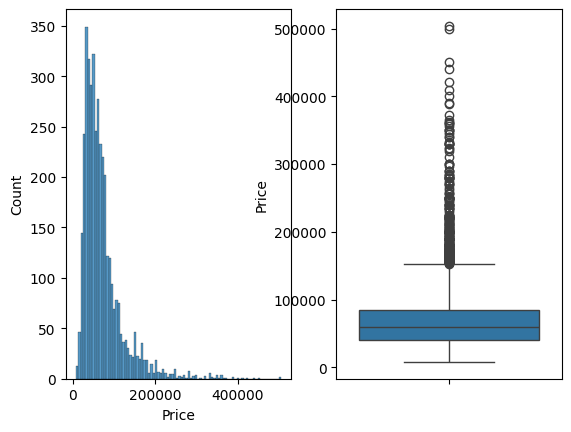

In [68]:
fig, axes = plt.subplots(1,2)
sns.histplot(data=df3, x='Price', ax=axes[0])
sns.boxplot(data=df3.Price, ax=axes[1])
plt.show()

<Axes: >

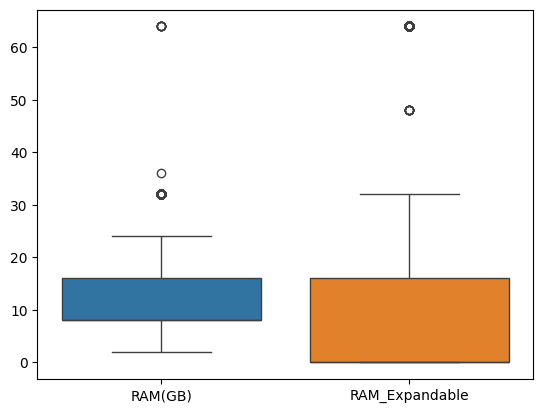

In [69]:
sns.boxplot(data=df3[['RAM(GB)', 'RAM_Expandable']])

In [70]:
numerical_cols = [col for col in df2.columns if df2[col].dtype == 'object']
for col in numerical_cols:
    print(df2.groupby(col)[col].agg('count'), '\n')

Brand
ASUS         989
AVITA         23
Acer         322
Apple         49
Coconics       3
Colorful       3
Dell         420
Fujitsu        8
Gigabyte      17
HP           803
Honor         14
Huawei         1
Infinix       39
LG            15
Lava           1
Lenovo       811
MSI          316
Micromax       3
Microsoft     34
Nokia          1
RDP            1
Razer          1
Realme         3
Samsung       61
Smartron       2
Tecno          2
VAIO           1
Wings          4
Xiaomi        10
Zebronics      8
iball         11
Name: Brand, dtype: int64 

Processor_Name
AMD Dual-Core A4 APU                  6
AMD Dual-Core A6 APU                 21
AMD Dual-Core A9 APU                 20
AMD Dual-Core A9 APU Processor        1
AMD Dual-Core APU                     8
                                     ..
Intel Pentium Quad-Core              43
Intel Pentium Quad-Core Processor     1
MediaTek Octa-core                    4
Microsoft SQ1 Processor               1
Qualcomm Snapdragon Octa

In [72]:
df2[df2['Ghz'].isnull()].groupby('Processor_Name')['Processor_Name'].agg('count')

,Processor_Name
Processor_Name,
AMD Dual-Core A9 APU Processor,1
AMD Dual-Core Athlon Processor,1
AMD Dual-Core Ryzen 3 Processor,2
AMD Hexa-Core Ryzen 5 Processor,16
AMD Octa-Core Ryzen 7 Processor,16
AMD Octa-Core Ryzen 9 Processor,1
AMD Quad-Core Ryzen 3 Processor,3
AMD Quad-Core Ryzen 5 Processor,3
AMD Quad-Core Ryzen 7 Processor,1


In [73]:
def fix_nan_Ghz(record):
  ghz = pd.isnull(record['Ghz'])
  if ghz:
    prefix = record['Processor_Name'].split()[0]
    try:
      res = float(prefix)
      return res
    except:
      return None
  return record['Ghz']

df3['Ghz'] = df2.apply(fix_nan_Ghz, axis=1)
df3[df3['Ghz'].isnull()].groupby('Processor_Name')['Processor_Name'].agg('count')

,Processor_Name
Processor_Name,
AMD Dual-Core A9 APU Processor,1
AMD Dual-Core Athlon Processor,1
AMD Dual-Core Ryzen 3 Processor,2
AMD Hexa-Core Ryzen 5 Processor,16
AMD Octa-Core Ryzen 7 Processor,16
AMD Octa-Core Ryzen 9 Processor,1
AMD Quad-Core Ryzen 3 Processor,3
AMD Quad-Core Ryzen 5 Processor,3
AMD Quad-Core Ryzen 7 Processor,1


In [79]:
def is_processor_name(text):
  if isinstance(text, str) and text.split()[0].isdigit():
      prefix = text.split()[0]
      try:
          float(prefix)
          return None
      except ValueError:
          return text
  else:
      return text

df3['Processor_Name'] = df2['Processor_Name'].apply(is_processor_name)

In [80]:
df3['Processor_Name'].unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5',
       'Intel Core i5 (12th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (11th Gen)',
       'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7',
       'AMD Dual-Core Ryzen 3', 'Intel Core i7 (13th Gen) Processor',
       'Intel Core i5 (13th Gen) Processor', 'Intel Core Ultra 5',
       'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3',
       'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)',
       'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)',
       'Intel Core i9 (12th Gen)', 'Intel Core i3 (11th Gen) Processor',
       'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)',
       'Intel Core i3 (10th Gen)', 'Intel Core i7 (13th Gen)',
       'Intel Core i3 (12th Gen) Processor', 'AMD Quad-Core Ryzen 5',
       'Apple M1', 'Intel Core i5 (5th Gen)', 'Apple M2 Processor',
       'AMD Hexa-Core Ryzen 5 Processor', 'Intel Core i3 (7th Gen)',
       'Intel Core i5 (8

In [81]:
df2.isnull().sum()

,0
Brand,0
Price,0
Processor_Name,21
RAM_Expandable,0
Ghz,203
Display_type,0
Display,1
GPU,8
SSD,0
HDD,0


In [82]:
df3 = df3.dropna()
df3.isnull().sum()

,0
Brand,0
Price,0
Processor_Name,0
RAM_Expandable,0
Ghz,0
Display_type,0
Display,0
GPU,0
SSD,0
HDD,0


In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 3975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3741 non-null   object 
 1   Price           3741 non-null   int64  
 2   Processor_Name  3741 non-null   object 
 3   RAM_Expandable  3741 non-null   int64  
 4   Ghz             3741 non-null   float64
 5   Display_type    3741 non-null   object 
 6   Display         3741 non-null   float64
 7   GPU             3741 non-null   object 
 8   SSD             3741 non-null   int64  
 9   HDD             3741 non-null   int64  
 10  RAM(GB)         3741 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 350.7+ KB


In [84]:
df4 = df3.copy()

In [85]:
brand_stats = df3.groupby('Brand')['Brand'].agg('count').sort_values(ascending=False)
brand_stats

,Brand
Brand,
ASUS,952
Lenovo,782
HP,758
Dell,402
MSI,298
Acer,262
Samsung,54
Infinix,39
Apple,34


In [86]:
brands_less_than_5 = brand_stats[brand_stats <5]
print(len(brands_less_than_5))

13


In [87]:
# convert brands with records less than 5 to 'other' brand
df4['Brand'] = df3['Brand'].apply(lambda x: 'other' if x in brands_less_than_5 else x)
print(len(df4['Brand'].unique()))

19


In [88]:
Processor_stats = df3.groupby('Processor_Name')['Processor_Name'].agg('count').sort_values(ascending=False)
Processor_stats

,Processor_Name
Processor_Name,
Intel Core i5 (11th Gen),316
Intel Core i5 (12th Gen),294
AMD Hexa-Core Ryzen 5,245
AMD Octa-Core Ryzen 7,239
Intel Core i3 (11th Gen),189
...,...
Intel Core 3 (Series 1),1
Apple M1,1
Apple M1 Pro,1


In [89]:
processor_less_than_10 = Processor_stats[Processor_stats <10]
print(len(processor_less_than_10))

40


In [90]:
# convert processor_Name with records less than 10 to 'other'
df4['Processor_Name'] = df3['Processor_Name'].apply(lambda x: 'other' if x in processor_less_than_10 else x)
print(len(df4['Processor_Name'].unique()))

43


In [91]:
display_stats = df3.groupby('Display_type')['Display_type'].agg('count').sort_values(ascending=True)
display_stats

,Display_type
Display_type,
LED,1818
LCD,1923


In [92]:
GPU_stats = df3.groupby('GPU')['GPU'].agg('count').sort_values(ascending=False)
GPU_stats

,GPU
GPU,
UHD,611
Iris Xe,533
Radeon,298
"GeForce RTX 3050 GPU, 4 GB",192
Integrated,143
...,...
"Iris Xe Max GPU, 4 GB",1
Iris graphics,1
"GeForce RTX 3050 GPU, 4",1


In [93]:
gpu_less_than_10 = GPU_stats[GPU_stats <10]
print(len(gpu_less_than_10))

240


In [94]:
# convert GPU with records less than 10 to 'other'
df4['GPU'] = df3['GPU'].apply(lambda x: 'other' if x in gpu_less_than_10 else x)
print(len(df4['GPU'].unique()))

50


In [95]:
df4['RAM_max'] = df4['RAM(GB)'] + df4['RAM_Expandable']
df4.groupby('RAM_max')['RAM_max'].agg('count')

,RAM_max
RAM_max,
2,15
3,2
4,334
6,2
8,866
10,2
12,72
14,1
16,883


In [96]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 3975
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3741 non-null   object 
 1   Price           3741 non-null   int64  
 2   Processor_Name  3741 non-null   object 
 3   RAM_Expandable  3741 non-null   int64  
 4   Ghz             3741 non-null   float64
 5   Display_type    3741 non-null   object 
 6   Display         3741 non-null   float64
 7   GPU             3741 non-null   object 
 8   SSD             3741 non-null   int64  
 9   HDD             3741 non-null   int64  
 10  RAM(GB)         3741 non-null   int64  
 11  RAM_max         3741 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 379.9+ KB


In [97]:
df5 = df4.copy()

In [99]:
df5['price_per_storage'] = df5['Price'] / (df5['SSD'] + df5['HDD'])
stats = df5.price_per_storage.describe()
stats

,price_per_storage
count,3741.000000
mean,122.716209
std,115.480577
min,14.487793
25%,64.433594
50%,107.402344
75%,148.437500
max,2420.625000


<Axes: xlabel='price_per_storage', ylabel='Count'>

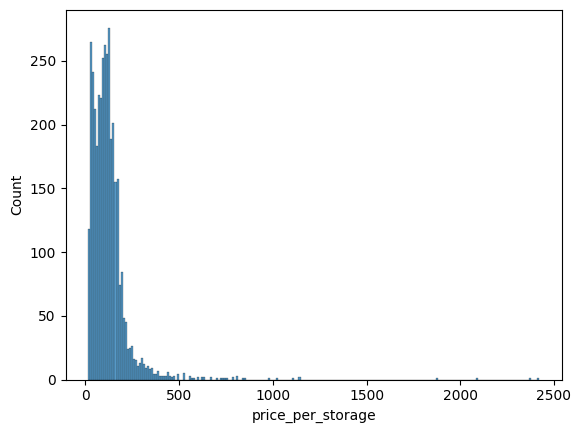

In [100]:
sns.histplot(data=df5, x='price_per_storage')

In [101]:
# what number of records in range of 2 std
df5[(df5['price_per_storage'] > stats['mean'] - 2 * stats['std']) & (df5['price_per_storage'] < stats['mean'] + 2 * stats['std'])].shape[0]

3653

In [102]:
# look at some of records out of range 2 std
df5[~((df5['price_per_storage'] > stats['mean'] - 2 * stats['std']) & (df5['price_per_storage'] < stats['mean'] + 2 * stats['std']))].head()

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB),RAM_max,price_per_storage
0,HP,22990,other,0,2.0,LED,11.6,other,64,0,4,4,359.218750
80,Apple,90900,other,16,2.9,LED,13.3,other,256,0,8,24,355.078125
82,Apple,67990,other,0,1.8,LED,13.3,other,128,0,8,8,531.171875
499,Microsoft,55990,other,0,3.4,LCD,10.5,Integrated,128,0,8,8,437.421875
545,Microsoft,102000,AMD Hexa-Core Ryzen 5,16,2.0,LCD,13.5,Radeon,256,0,8,24,398.437500


In [109]:
df6 = df5.copy()
df6.head()

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB),RAM_max,price_per_storage
0,HP,22990,other,0,2.0,LED,11.6,other,64,0,4,4,359.218750
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,12,4.0,LCD,15.6,Radeon,512,0,8,20,70.876953
2,Dell,78500,Intel Core i5 (12th Gen),32,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",512,0,16,48,153.320312
3,HP,55490,Intel Core i5 (12th Gen),8,4.2,LCD,15.6,Iris Xe,512,0,8,16,108.378906
4,Infinix,21990,Intel Core i3 (11th Gen),0,1.7,LCD,15.6,UHD,512,0,8,8,42.949219


In [111]:
df6 = df5.drop(columns=['price_per_storage', 'RAM_max'], axis=1)
df6.head()

,Brand,Price,Processor_Name,RAM_Expandable,Ghz,Display_type,Display,GPU,SSD,HDD,RAM(GB)
0,HP,22990,other,0,2.0,LED,11.6,other,64,0,4
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,12,4.0,LCD,15.6,Radeon,512,0,8
2,Dell,78500,Intel Core i5 (12th Gen),32,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",512,0,16
3,HP,55490,Intel Core i5 (12th Gen),8,4.2,LCD,15.6,Iris Xe,512,0,8
4,Infinix,21990,Intel Core i3 (11th Gen),0,1.7,LCD,15.6,UHD,512,0,8


In [112]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 3975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3741 non-null   object 
 1   Price           3741 non-null   int64  
 2   Processor_Name  3741 non-null   object 
 3   RAM_Expandable  3741 non-null   int64  
 4   Ghz             3741 non-null   float64
 5   Display_type    3741 non-null   object 
 6   Display         3741 non-null   float64
 7   GPU             3741 non-null   object 
 8   SSD             3741 non-null   int64  
 9   HDD             3741 non-null   int64  
 10  RAM(GB)         3741 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 350.7+ KB


In [113]:
df7 = df6.copy()

In [114]:
# 1. convert categorical variables into (one-hot Encoding)¶
columns = {}    # we will need it later
for col in df7.columns:
    if df7[col].dtype == 'object':
        # 1 get dummies variables
        dummies = pd.get_dummies(df7[col])
        # 2 delete one of them (avoid 'Dummy Variable Trap')
        dummies = dummies.drop(['other' if col!='Display_type' else 'LED'], axis='columns')
        columns[f'{col}_columns'] = [x.lower() for x in dummies.columns]
        # 3 concat with the dataset
        df7 = pd.concat([df7, dummies], axis='columns')
        # 4 drop the categorical Variable
        df7 = df7.drop([col], axis='columns')
df7.shape

(3741, 117)

In [115]:
df7.sample(5)

,Price,RAM_Expandable,Ghz,Display,SSD,HDD,RAM(GB),ASUS,AVITA,Acer,...,Radeon R4,Radeon R5,Radeon Vega 3,Radeon Vega 8,UHD,UHD 600,UHD 605,UHD 617,UHD 620,UHD Graphics
1609,45500,16,1.2,15.6,256,1024,8,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1141,25999,8,1.1,15.6,512,0,8,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1105,56490,16,2.1,14.0,512,0,16,False,False,False,...,False,False,False,False,True,False,False,False,False,False
563,86000,32,2.4,14.0,512,0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625,135008,0,2.0,15.6,512,0,8,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [116]:
# 2. Isolate dependant Var. from independant ones (i.e X,y)¶
X = df7.drop(['Price'], axis='columns')
X.head()

,RAM_Expandable,Ghz,Display,SSD,HDD,RAM(GB),ASUS,AVITA,Acer,Apple,...,Radeon R4,Radeon R5,Radeon Vega 3,Radeon Vega 8,UHD,UHD 600,UHD 605,UHD 617,UHD 620,UHD Graphics
0,0,2.0,11.6,64,0,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12,4.0,15.6,512,0,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,32,3.3,15.6,512,0,16,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,4.2,15.6,512,0,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1.7,15.6,512,0,8,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [117]:
y = df7.Price
y.head()

,Price
0,22990
1,36289
2,78500
3,55490
4,21990


In [118]:
# 3. Train the Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79869174, 0.80073234, 0.82004937, 0.81251731, 0.77330705])

In [121]:
# find best Model using GridSearchCV()
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params' : {
                'n_jobs': [None, 100, 200]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model' : algo,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.801060,{'n_jobs': None}
1,lasso,0.801404,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.689561,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [122]:
# chọn mô hình Linear Regression là mô hình tót nhất
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình với tham số tối ưu
final_model = LinearRegression(n_jobs=None)

# Huấn luyện mô hình
final_model.fit(X, y)


LinearRegression()

In [123]:
#Hiệu suất trên dữ liệu huấn luyện
from sklearn.metrics import r2_score, mean_squared_error

y_pred = final_model.predict(X)
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

R² Score: 0.8138385485683428
MSE: 512680911.29894364


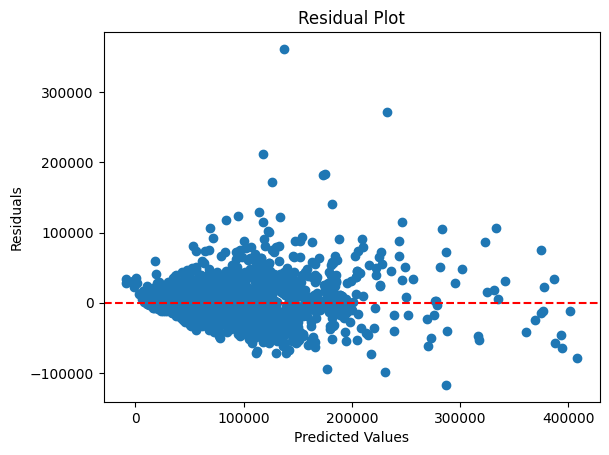

In [124]:
import matplotlib.pyplot as plt

residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [125]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': final_model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                         Feature    Coefficient
86   GeForce RTX 4090 GPU, 16 GB  133209.523257
85   GeForce RTX 4080 GPU, 12 GB   86601.029298
9                          Apple   81712.905939
62      Intel Core i9 (12th Gen)   67701.528276
19                     Microsoft   61354.300923
..                           ...            ...
22                     Zebronics  -26675.758182
99                     Iris Plus  -31380.822667
67                           Arc  -32861.787168
113                      UHD 617  -32942.090447
15                       Infinix  -33133.959678

[116 rows x 2 columns]


<ipython-input-143-eaa4cee487b4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='coolwarm')


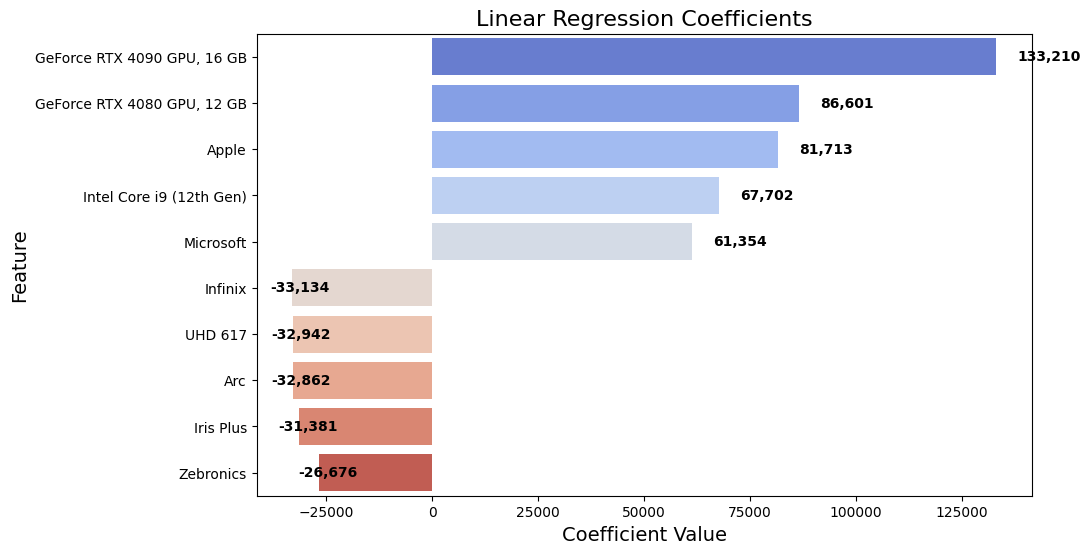

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử bạn có bảng dữ liệu `coefficients` chứa tên các đặc trưng và hệ số hồi quy
# Đây là ví dụ bảng dữ liệu

coefficients = pd.DataFrame({
    'Feature': ['GeForce RTX 4090 GPU, 16 GB', 'GeForce RTX 4080 GPU, 12 GB', 'Apple', 'Intel Core i9 (12th Gen)', 'Microsoft', 'Zebronics', 'Iris Plus', 'Arc', 'UHD 617', 'Infinix'],
    'Coefficient': [133209.523257, 86601.029298, 81712.905939, 67701.528276, 61354.300923, -26675.758182, -31380.822667, -32861.787168, -32942.090447, -33133.959678]
})

# Sắp xếp theo giá trị tuyệt đối của hệ số để dễ dàng so sánh
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='abs_coefficient', ascending=False)

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='coolwarm')

# Thêm nhãn dữ liệu vào từng thanh
for i, v in enumerate(coefficients_sorted['Coefficient']):
    ax.text(v + (5000 if v > 0 else -5000), i, f'{v:,.0f}', color='black', va='center', fontweight='bold')


# Thêm tiêu đề và nhãn
plt.title('Linear Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


<ipython-input-132-02a2924ee19b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_coefficient', y='Feature', data=coefficients_sorted, palette='viridis')


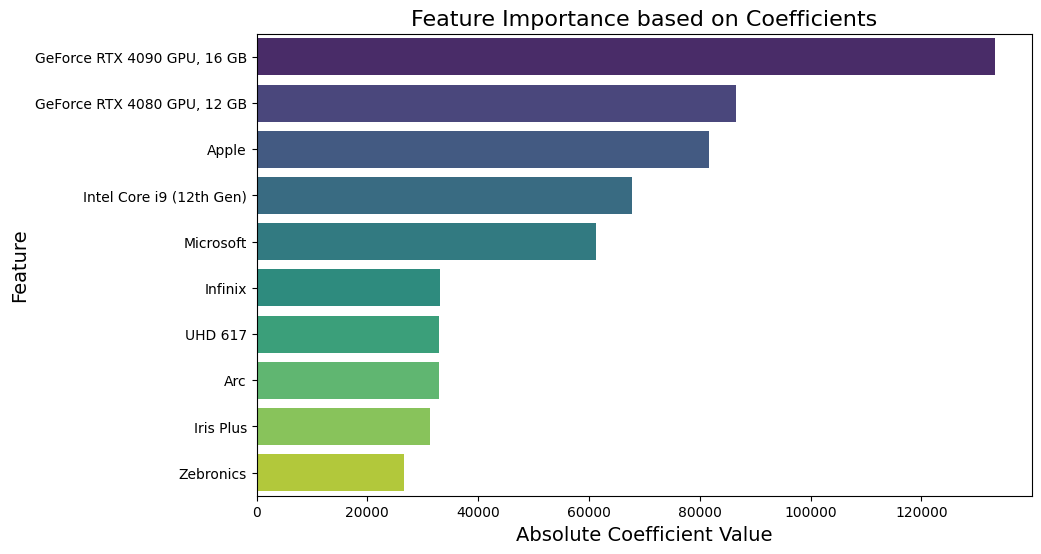

In [132]:
# Biểu đồ quan trọng của đặc trưng (sử dụng giá trị tuyệt đối của hệ số)
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coefficient', y='Feature', data=coefficients_sorted, palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Feature Importance based on Coefficients', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


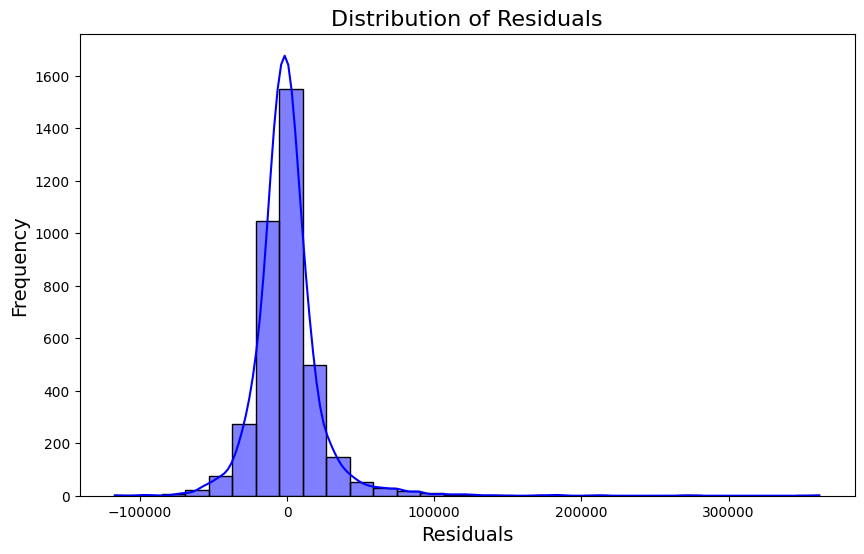

In [134]:
# kiểm tra độ chính xác của mô hình.
import numpy as np

# Dự đoán giá trị từ mô hình Linear Regression
y_pred = final_model.predict(X)

# Tính phần dư
residuals = y - y_pred

# Biểu đồ phân phối phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



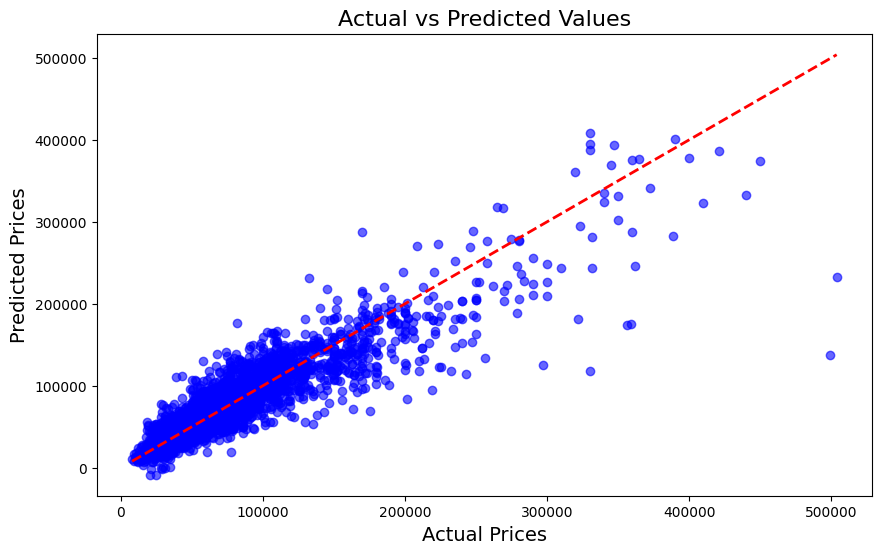

In [136]:
# Biểu đồ giá trị thực tế vs giá trị dự đoán (Actual vs Predicted)
# Biểu đồ này giúp bạn so sánh giá trị thực tế với giá trị dự đoán từ mô hình Linear Regression.

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Đường chéo
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.show()